In [1]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt

2024-06-10 18:38:41.957206: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Daten einlesen lokal LP
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
kiwo_df = pd.read_csv('kiwo.csv')
wetter_df = pd.read_csv('wetter.csv')

# Convert date columns to datetime format
train_df['Datum'] = pd.to_datetime(train_df['Datum'])
test_df['Datum'] = pd.to_datetime(test_df['Datum'])
wetter_df['Datum'] = pd.to_datetime(wetter_df['Datum'])
kiwo_df['Datum'] = pd.to_datetime(kiwo_df['Datum'])

In [3]:
# Merge the datasets
train_df = pd.merge(train_df, wetter_df, on='Datum', how='left')
test_df = pd.merge(test_df, wetter_df, on='Datum', how='left')

train_df = pd.merge(train_df, kiwo_df, on='Datum', how='left')
test_df = pd.merge(test_df, kiwo_df, on='Datum', how='left')

train_df['KielerWoche'] = train_df['KielerWoche'].fillna(0)
test_df['KielerWoche'] = test_df['KielerWoche'].fillna(0)

In [4]:
# Handle missing values in weather-related columns
train_df['Bewoelkung'] = train_df['Bewoelkung'].fillna(train_df['Bewoelkung'].mean())
train_df['Temperatur'] = train_df['Temperatur'].fillna(train_df['Temperatur'].mean())
train_df['Windgeschwindigkeit'] = train_df['Windgeschwindigkeit'].fillna(train_df['Windgeschwindigkeit'].mean())
train_df['Wettercode'] = train_df['Wettercode'].fillna(train_df['Wettercode'].mode()[0])

test_df['Bewoelkung'] = test_df['Bewoelkung'].fillna(test_df['Bewoelkung'].mean())
test_df['Temperatur'] = test_df['Temperatur'].fillna(test_df['Temperatur'].mean())
test_df['Windgeschwindigkeit'] = test_df['Windgeschwindigkeit'].fillna(test_df['Windgeschwindigkeit'].mean())
test_df['Wettercode'] = test_df['Wettercode'].fillna(test_df['Wettercode'].mode()[0])

In [5]:
# Feature engineering: Extract additional features from the date column
def extract_date_features(df):
    df['Year'] = df['Datum'].dt.year
    df['Month'] = df['Datum'].dt.month
    df['Day'] = df['Datum'].dt.day
    df['DayOfWeek'] = df['Datum'].dt.dayofweek
    df['WeekOfYear'] = df['Datum'].dt.isocalendar().week
    df['Quarter'] = df['Datum'].dt.quarter
    return df

train_df = extract_date_features(train_df)
test_df = extract_date_features(test_df)

In [6]:
# Define features and target variable
features = ['Bewoelkung', 'Temperatur', 'Windgeschwindigkeit', 'Wettercode', 
            'KielerWoche', 'Year', 'Month', 'Day', 'DayOfWeek', 'WeekOfYear', 'Quarter', 'Warengruppe']
target = 'Umsatz'

X = train_df[features]
y = train_df[target]

In [7]:
# Normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_test = scaler.transform(test_df[features])

In [8]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the neural network model using TensorFlow
model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
# Model chatgpt-Sven 10.06.24

# Compile the model
# model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
# history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)

Epoch 1/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5596.0923 - val_loss: 2950.3298
Epoch 2/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5336.1499 - val_loss: 2885.9951
Epoch 3/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6000.6128 - val_loss: 2776.3479
Epoch 4/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5229.3765 - val_loss: 2776.2644
Epoch 5/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5004.6636 - val_loss: 3005.8594
Epoch 6/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5279.8350 - val_loss: 2802.7654
Epoch 7/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5377.0728 - val_loss: 2772.8154
Epoch 8/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6092.8730 - val_loss: 2675.2869
Epoch 9/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5923.0151 - val_loss: 2795.4368
Epoch 10/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5544.6938 - val_loss: 2719.4290


In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam

model.compile(loss="mse", optimizer=Adam (learning_rate=0.001))

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)



Epoch 1/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 5054.8296 - val_loss: 2465.4512
Epoch 2/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4684.9839 - val_loss: 2363.1418
Epoch 3/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5889.9497 - val_loss: 2356.6213
Epoch 4/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4733.9722 - val_loss: 2373.0557
Epoch 5/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3935.3491 - val_loss: 2384.3179
Epoch 6/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4637.8242 - val_loss: 2417.7063
Epoch 7/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4123.1719 - val_loss: 2379.4919
Epoch 8/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4563.6558 - val_loss: 2592.6338
Epoch 9/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4537.8184 - val_loss: 2355.4128
Epoch 10/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4372.9019 - val_loss: 2421.9500


In [30]:
# Evaluate the model
y_pred = model.predict(X_val)
mape = mean_absolute_percentage_error(y_val, y_pred)
print(f'TensorFlow Neural Network MAPE: {mape}')

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  
TensorFlow Neural Network MAPE: 0.23096464753169743


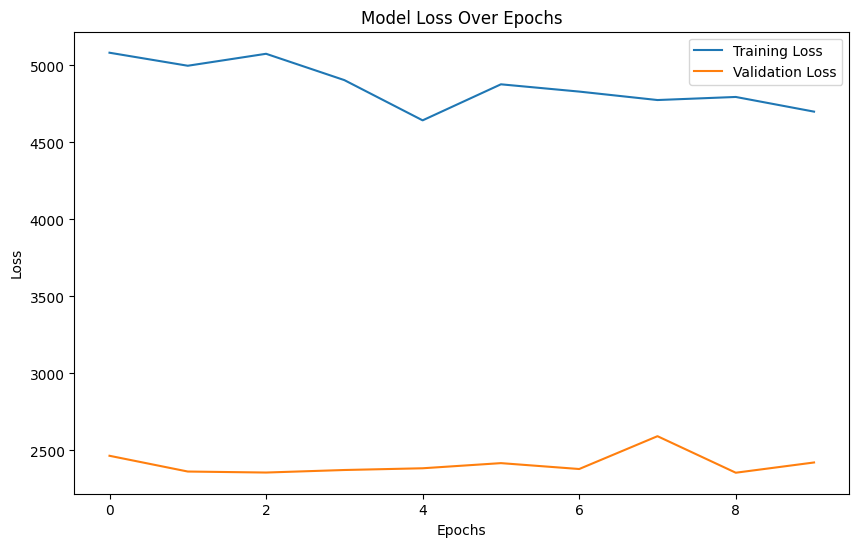

In [31]:
# Plot the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [32]:
# Make predictions on the test set
test_predictions = model.predict(X_test)

58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [35]:
# Prepare the submission file
submission_df = test_df[['id']].copy()
submission_df['umsatz'] = test_predictions
submission_df.to_csv('Tensorflow_v3.csv', index=False)